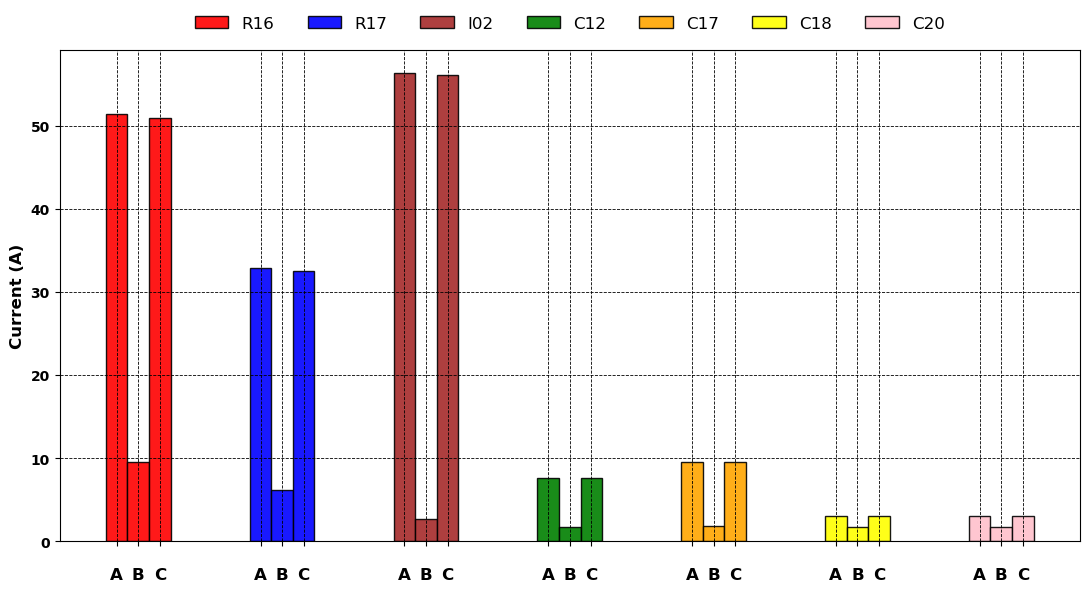

In [1]:
## Current without Droop, bar figure Topology-3, case-1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files
def read_current_data(filename):
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None


# Read data from CSV files.
phase_a_data = read_current_data('Current_phase_a_output_Without_Droop_Topology3_case1.csv')
phase_b_data = read_current_data('Current_phase_b_output_Without_Droop_Topology3_case1.csv')
phase_c_data = read_current_data('Current_phase_c_output_Without_Droop_Topology3_case1.csv')

# Check if any of the files failed to load
if phase_a_data is None or phase_b_data is None or phase_c_data is None:
    print("Could not load all necessary CSV files. Exiting.")
    exit()


# Create a dictionary to consolidate data from all phases for each bus
bus_data = {}
for index, row in phase_a_data.iterrows():
    bus = row['Bus']  # CSV has a 'Bus' column
    bus_data[bus] = [row['Phase A Current (A)'], 0, 0]  # Initialize with zeros for phases B and C

for index, row in phase_b_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][1] = row['Phase B Current (A)']

for index, row in phase_c_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][2] = row['Phase C Current (A)']

# Select the buses you want to plot. Adjust as needed.
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']   # Example
plot_data = {bus: data for bus, data in bus_data.items() if bus in selected_buses}

# Define a dictionary to map bus names to colors
bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Plotting section
fig, ax = plt.subplots(figsize=(11, 6))
bar_width = 0.15
x_positions = np.arange(len(plot_data))

handles = []
labels = []

for i, (bus, currents) in enumerate(plot_data.items()):
    num_phases = len(currents)
    color = bus_colors.get(bus, 'gray')

    bars = ax.bar(x_positions[i] + np.arange(num_phases) * bar_width, currents, bar_width,
                  label=bus, alpha=0.9, color=color, edgecolor='black', linewidth=1)
    handles.append(bars[0])
    labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Dynamically set xticks and labels
xticks = []
xticklabels = []
for i in range(len(plot_data)):
    num_phases = len(list(plot_data.values())[i])
    xticks.extend([x_positions[i] + bar_width * j for j in range(num_phases)])
    xticklabels.extend([chr(65 + j) for j in range(num_phases)])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontweight='bold', fontsize=12)
ax.tick_params(axis='x', which='major', pad=15)

ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data), frameon=False,
          prop={'size': 12})
ax.grid(True, which='both', linestyle='--', linewidth=0.6, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

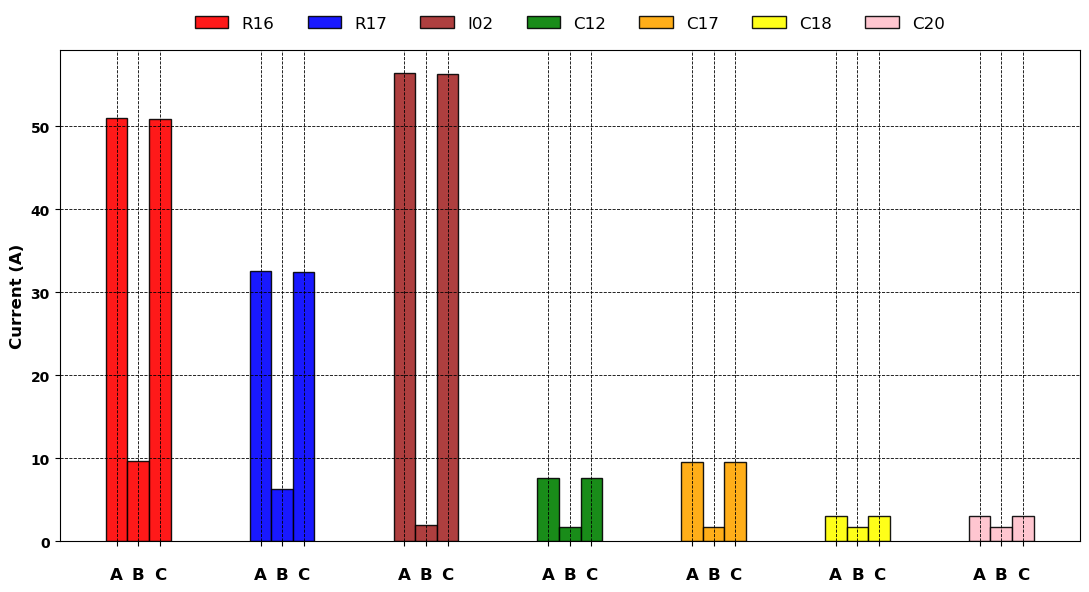

In [3]:
## Current with Droop, bar figure Topology-3, case-1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files
def read_current_data(filename):
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None


# Read data from CSV files.
phase_a_data = read_current_data('Current_phase_a_output_With_Droop_Topology3_case1.csv')
phase_b_data = read_current_data('Current_phase_b_output_With_Droop_Topology3_case1.csv')
phase_c_data = read_current_data('Current_phase_c_output_With_Droop_Topology3_case1.csv')

# Check if any of the files failed to load
if phase_a_data is None or phase_b_data is None or phase_c_data is None:
    print("Could not load all necessary CSV files. Exiting.")
    exit()


# Create a dictionary to consolidate data from all phases for each bus
bus_data = {}
for index, row in phase_a_data.iterrows():
    bus = row['Bus']  # CSV has a 'Bus' column
    bus_data[bus] = [row['Phase A Current (A)'], 0, 0]  # Initialize with zeros for phases B and C

for index, row in phase_b_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][1] = row['Phase B Current (A)']

for index, row in phase_c_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][2] = row['Phase C Current (A)']

# Select the buses you want to plot. Adjust as needed.
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']   # Example
plot_data = {bus: data for bus, data in bus_data.items() if bus in selected_buses}

# Define a dictionary to map bus names to colors
bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Plotting section
fig, ax = plt.subplots(figsize=(11, 6))
bar_width = 0.15
x_positions = np.arange(len(plot_data))

handles = []
labels = []

for i, (bus, currents) in enumerate(plot_data.items()):
    num_phases = len(currents)
    color = bus_colors.get(bus, 'gray')

    bars = ax.bar(x_positions[i] + np.arange(num_phases) * bar_width, currents, bar_width,
                  label=bus, alpha=0.9, color=color, edgecolor='black', linewidth=1)
    handles.append(bars[0])
    labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Dynamically set xticks and labels
xticks = []
xticklabels = []
for i in range(len(plot_data)):
    num_phases = len(list(plot_data.values())[i])
    xticks.extend([x_positions[i] + bar_width * j for j in range(num_phases)])
    xticklabels.extend([chr(65 + j) for j in range(num_phases)])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontweight='bold', fontsize=12)
ax.tick_params(axis='x', which='major', pad=15)

ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data), frameon=False,
          prop={'size': 12})
ax.grid(True, which='both', linestyle='--', linewidth=0.6, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

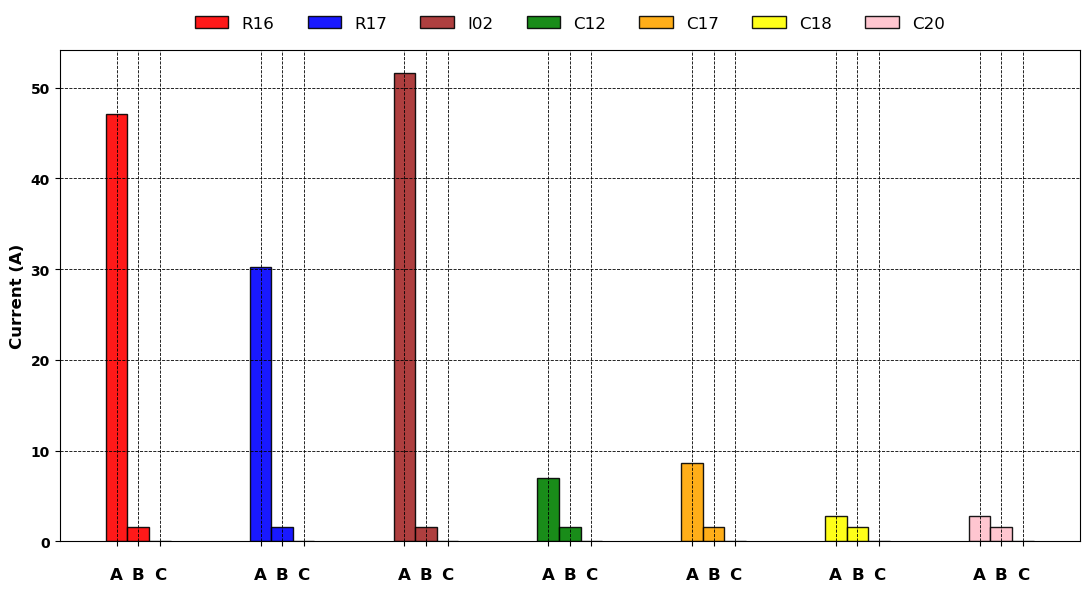

In [4]:
## Current without Droop, bar figure Topology-3, case-3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files
def read_current_data(filename):
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None


# Read data from CSV files.
phase_a_data = read_current_data('Current_phase_a_output_Without_Droop_Topology3_case3.csv')
phase_b_data = read_current_data('Current_phase_b_output_Without_Droop_Topology3_case3.csv')
phase_c_data = read_current_data('Current_phase_c_output_Without_Droop_Topology3_case3.csv')

# Check if any of the files failed to load
if phase_a_data is None or phase_b_data is None or phase_c_data is None:
    print("Could not load all necessary CSV files. Exiting.")
    exit()


# Create a dictionary to consolidate data from all phases for each bus
bus_data = {}
for index, row in phase_a_data.iterrows():
    bus = row['Bus']  # CSV has a 'Bus' column
    bus_data[bus] = [row['Phase A Current (A)'], 0, 0]  # Initialize with zeros for phases B and C

for index, row in phase_b_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][1] = row['Phase B Current (A)']

for index, row in phase_c_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][2] = row['Phase C Current (A)']

# Select the buses you want to plot. Adjust as needed.
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']   # Example
plot_data = {bus: data for bus, data in bus_data.items() if bus in selected_buses}

# Define a dictionary to map bus names to colors
bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Plotting section
fig, ax = plt.subplots(figsize=(11, 6))
bar_width = 0.15
x_positions = np.arange(len(plot_data))

handles = []
labels = []

for i, (bus, currents) in enumerate(plot_data.items()):
    num_phases = len(currents)
    color = bus_colors.get(bus, 'gray')

    bars = ax.bar(x_positions[i] + np.arange(num_phases) * bar_width, currents, bar_width,
                  label=bus, alpha=0.9, color=color, edgecolor='black', linewidth=1)
    handles.append(bars[0])
    labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Dynamically set xticks and labels
xticks = []
xticklabels = []
for i in range(len(plot_data)):
    num_phases = len(list(plot_data.values())[i])
    xticks.extend([x_positions[i] + bar_width * j for j in range(num_phases)])
    xticklabels.extend([chr(65 + j) for j in range(num_phases)])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontweight='bold', fontsize=12)
ax.tick_params(axis='x', which='major', pad=15)

ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data), frameon=False,
          prop={'size': 12})
ax.grid(True, which='both', linestyle='--', linewidth=0.6, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

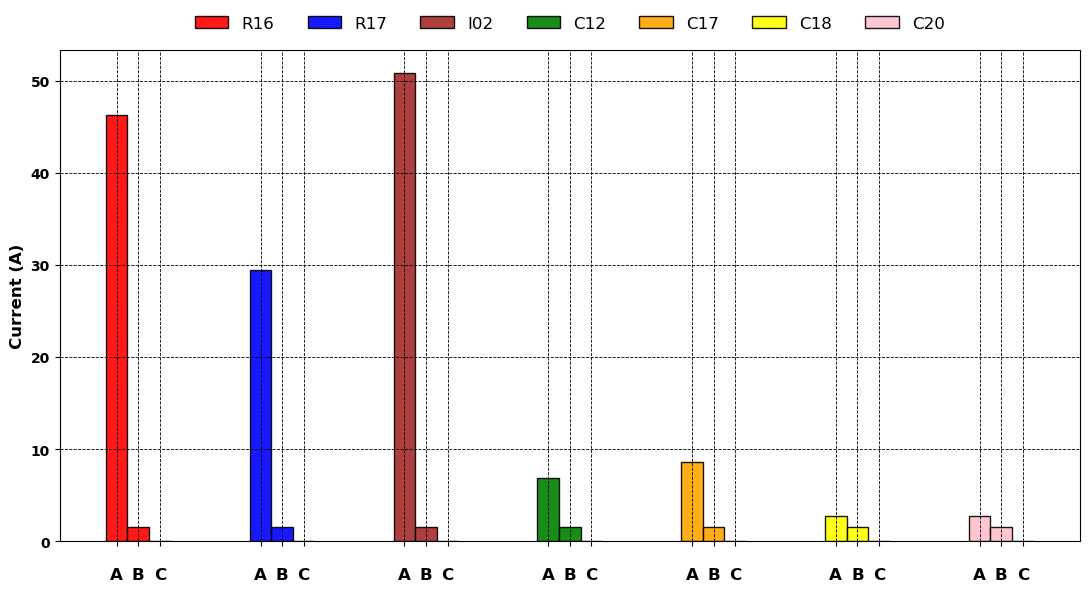

In [5]:
## Current with Droop, bar figure Topology-3, case-3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files
def read_current_data(filename):
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None


# Read data from CSV files.
phase_a_data = read_current_data('Current_phase_a_output_With_Droop_Topology3_case3.csv')
phase_b_data = read_current_data('Current_phase_b_output_With_Droop_Topology3_case3.csv')
phase_c_data = read_current_data('Current_phase_c_output_With_Droop_Topology3_case3.csv')

# Check if any of the files failed to load
if phase_a_data is None or phase_b_data is None or phase_c_data is None:
    print("Could not load all necessary CSV files. Exiting.")
    exit()


# Create a dictionary to consolidate data from all phases for each bus
bus_data = {}
for index, row in phase_a_data.iterrows():
    bus = row['Bus']  # CSV has a 'Bus' column
    bus_data[bus] = [row['Phase A Current (A)'], 0, 0]  # Initialize with zeros for phases B and C

for index, row in phase_b_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][1] = row['Phase B Current (A)']

for index, row in phase_c_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][2] = row['Phase C Current (A)']

# Select the buses you want to plot. Adjust as needed.
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']   # Example
plot_data = {bus: data for bus, data in bus_data.items() if bus in selected_buses}

# Define a dictionary to map bus names to colors
bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Plotting section
fig, ax = plt.subplots(figsize=(11, 6))
bar_width = 0.15
x_positions = np.arange(len(plot_data))

handles = []
labels = []

for i, (bus, currents) in enumerate(plot_data.items()):
    num_phases = len(currents)
    color = bus_colors.get(bus, 'gray')

    bars = ax.bar(x_positions[i] + np.arange(num_phases) * bar_width, currents, bar_width,
                  label=bus, alpha=0.9, color=color, edgecolor='black', linewidth=1)
    handles.append(bars[0])
    labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Dynamically set xticks and labels
xticks = []
xticklabels = []
for i in range(len(plot_data)):
    num_phases = len(list(plot_data.values())[i])
    xticks.extend([x_positions[i] + bar_width * j for j in range(num_phases)])
    xticklabels.extend([chr(65 + j) for j in range(num_phases)])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontweight='bold', fontsize=12)
ax.tick_params(axis='x', which='major', pad=15)

ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data), frameon=False,
          prop={'size': 12})
ax.grid(True, which='both', linestyle='--', linewidth=0.6, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [ ]:
## End